In [93]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Configure plot display attributes

In [94]:
# Configure matplotlib

%matplotlib inline
color_baseline = '#f46a4e'
color_optimized1 = '#f4874b'
color_optimized2 = '#f3b05a'
color_npbench_CPU = '#5c4a72'
color_npbench_GPU = '#a3586d'
# hatch_npbench_GPU = 'o'

# tick_spacing = 50

GRAPH_VALUE_MARKING = 20
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

# plt.rc('font', family='Times New Roman') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the figure title

annotation_offset = 0

## Azimint

### Roofline

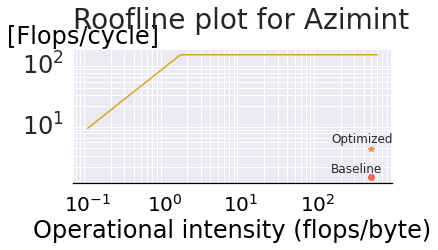

In [95]:
# Data points
kernel_name = 'Azimint'
#peak performance [GFLOPS]
peak_perf = 138.65 # flops per cycle
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[499.88, 1.33, color_baseline, 'o'],  # computational intensity, performance
          [500.38, 3.94, color_optimized1, '*']]

kernel_names = ['Baseline', 'Optimized']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.1,600,0.1)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 350, kernel[0][1] + 0.25), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 350, kernel[1][1] + 1), fontsize = 12)

## Roofline settings #########################################################################

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Flops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.27, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

In [1]:
# Data points ####################################################################################

kernel_name = 'Azimint'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([7134,71340,713398,17835])
optimized_1 = np.array([2032,20320,203200,5080])
optimized_2 = np.array([4.563,45.626,456,11.407])
npbench_cpu = np.array([18,201,2890,42])

# baseline = np.true_divide(baseline, 1000.0)
# optimized_1 = np.true_divide(optimized_1, 1000.0)
# npbench_cpu = np.true_divide(npbench_cpu, 1000.0)
## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - 1.5*bar_width, baseline, width= bar_width, color=color_baseline,
       label="base", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks -0.5*bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="opt1", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + 1.5*bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="CPU", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks + 0.5*bar_width, optimized_2, width= bar_width, color=color_optimized2,
       label="opt2", edgecolor = 'black')

## PLOT settings #########################################################################

def autolabel(rects, bar_label):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        # if height < 0.099:
        #     printer = '%.0fms' % (height*1000)
        # else:
        #     
        printer = '%.0f' % height
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                printer, fontsize=12,
                ha='center', va='bottom')
        
        height = 0.2
        ax1.text(rect.get_x() + rect.get_width()/2., height,
                bar_label, fontsize=14, rotation = 90,
                ha='center', va='bottom', color = 'white')
autolabel(rects1, "cpu")
autolabel(rects2, "opt1")
autolabel(rects3, "base")
autolabel(rects4, 'opt2')

# ax1.set_title('Runtime for {}'.format(kernel_name), loc='left', pad = 25)
# ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Runtime (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)
# plt.legend(ncol = 2, bbox_to_anchor=(0.49, 1.22), frameon=False)
plt.tight_layout() #Cuts waste white space

## PLOT settings #########################################################################

plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


NameError: name 'np' is not defined

## Conv2D

### Roofline

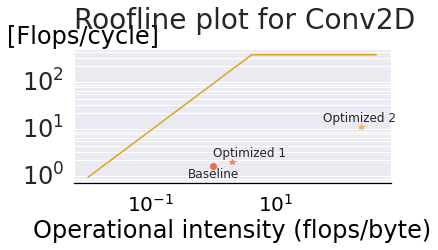

In [ ]:
# Data points
kernel_name = 'Conv2D'
#peak performance [GFLOPS]
peak_perf = 348.98
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[1, 1.46, color_baseline, 'o'], 
          [2, 1.8, color_optimized1, '*'], 
          [231.36206, 10.25, color_optimized2, '*']]

kernel_names = ['Baseline', 'Optimized 1', 'Optimized 2']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,400,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 0.6, kernel[0][1] - 0.6), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 1, kernel[1][1] + 0.6), fontsize = 12)
ax.annotate(kernel_names[2], xy = (kernel[2][0] - 175, kernel[2][1] + 3), fontsize = 12)

## Roofline settings #########################################################################

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Flops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.27, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

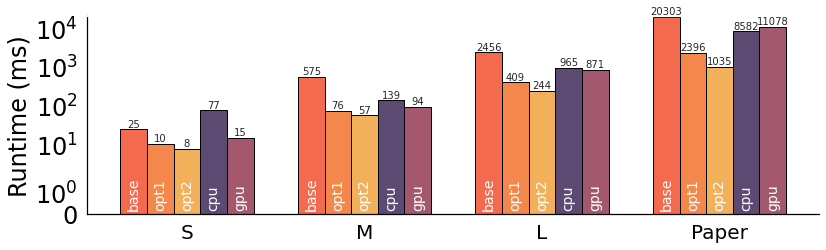

In [ ]:
# Data points ####################################################################################

kernel_name = 'Conv2D'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([24.6,575,2456,20303])
optimized_1 = np.array([10.427,75.929,409,2396])
optimized_2 = np.array([7.592,57.234,244,1035])
npbench_cpu = np.array([77,139,965,8582])
npbench_gpu = np.array([15,94,871,11078])

# baseline = np.true_divide(baseline, 1000.0)
# optimized_1 = np.true_divide(optimized_1, 1000.0)
# npbench_cpu = np.true_divide(npbench_cpu, 1000.0)
# optimized_2 = np.true_divide(optimized_2, 1000.0)
# npbench_gpu = np.true_divide(npbench_gpu, 1000.0)

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.15

rects3 = ax1.bar(input_size_xaxis_ticks - 2*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks - bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized 1", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks, optimized_2, width= bar_width, color=color_optimized2,
       label="Optimized 2", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

rects5 = ax1.bar(input_size_xaxis_ticks + 2*bar_width, npbench_gpu, width= bar_width, color=color_npbench_GPU,
       label="NPBench GPU", edgecolor = 'black')

## PLOT settings #########################################################################

def autolabel(rects, bar_label):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        # if height < 0.099:
        #     printer = '%.0fms' % (height*1000)
        # else:
        #     
        printer = '%.0f' % height
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                printer, fontsize=10,
                ha='center', va='bottom')
        
        height = 0.2
        ax1.text(rect.get_x() + rect.get_width()/2., height,
                bar_label, fontsize=14, rotation = 90,
                ha='center', va='bottom', color = 'white')
autolabel(rects1, "opt2")
autolabel(rects2, "opt1")
autolabel(rects3, "base")
autolabel(rects4, "cpu")
autolabel(rects5, "gpu")
# ax1.set_title('Runtime for {}'.format(kernel_name), loc='left', pad = 25)
# ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Runtime (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)
# plt.legend(ncol = 2, bbox_to_anchor=(0.49, 1.22), frameon=False)
plt.tight_layout() #Cuts waste white space

## PLOT settings #########################################################################
plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Durbin

### Roofline

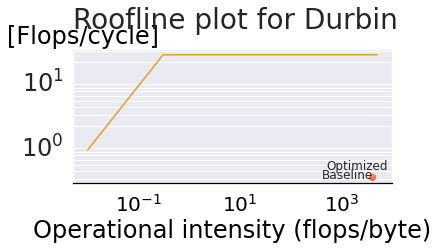

In [ ]:
# Data points
kernel_name = 'Durbin'
#peak performance [GFLOPS]
peak_perf = 26.04
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[4001, 0.32, color_baseline, 'o'], 
          [4001, 0.33, color_optimized1, '*']] 

kernel_names = ['Baseline', 'Optimized']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,5000,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 3600, kernel[0][1] - 0.01), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 3500, kernel[1][1] + 0.1), fontsize = 12)

## Roofline settings #########################################################################

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Flops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.27, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

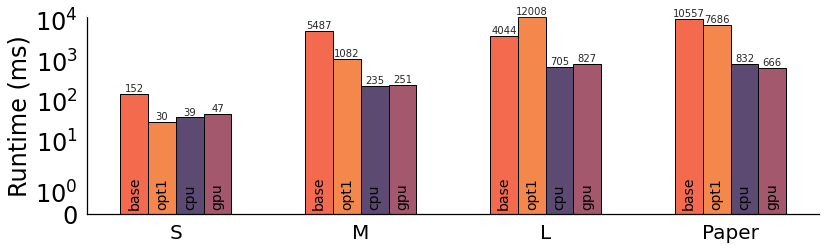

In [ ]:
# Data points ####################################################################################

kernel_name = 'Durbin'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([152,5487,4044,10557])
optimized_1 = np.array([30,1082,12008,7686])
optimized_2 = np.array([0.00446,0.06306,0.149,0.226])
npbench_cpu = np.array([39,235,705,832])
npbench_gpu = np.array([47,251,827,666])

# baseline = np.true_divide(baseline, 1000.0)
# optimized_1 = np.true_divide(optimized_1, 1000.0)
# npbench_cpu = np.true_divide(npbench_cpu, 1000.0)
# optimized_2 = np.true_divide(optimized_2, 1000.0)
# npbench_gpu = np.true_divide(npbench_gpu, 1000.0)

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.15

rects3 = ax1.bar(input_size_xaxis_ticks - 1.5*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks - 0.5*bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks + 0.5*bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

rects5 = ax1.bar(input_size_xaxis_ticks + 1.5*bar_width, npbench_gpu, width= bar_width, color=color_npbench_GPU,
       label="NPBench GPU", edgecolor = 'black')

# rects1 = ax1.bar(input_size_xaxis_ticks + 2*bar_width, optimized_2, width= bar_width, color=color_optimized2,
    #    label="Optimized 2", edgecolor = 'black')

## PLOT settings #########################################################################

def autolabel(rects, bar_label):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        # if height < 0.099:
        #     printer = '%.0fms' % (height*1000)
        # else:
        printer = '%.0f' % height
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                printer, fontsize=10,
                ha='center', va='bottom')
        
        height = 0.2
        ax1.text(rect.get_x() + rect.get_width()/2., height,
                bar_label, fontsize=14, rotation = 90,
                ha='center', va='bottom', color = 'white')
autolabel(rects2, "opt1")
autolabel(rects3, "base")
autolabel(rects4, "cpu")
autolabel(rects5, "gpu")
# ax1.set_title('Runtime for {}'.format(kernel_name), loc='left', pad = 25)
# ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Runtime (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)
# plt.legend(ncol = 2, bbox_to_anchor=(0.49, 1.22), frameon=False)
plt.tight_layout() #Cuts waste white space

## PLOT settings #########################################################################
plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


## Gramschmidt

### Roofline

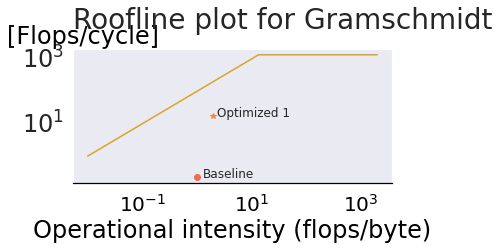

In [ ]:
# Data points
kernel_name = 'Gramschmidt'
#peak performance [GFLOPS]
peak_perf = 1137
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[1, 0.19, color_baseline, 'o'], 
          [1.98312, 14.67, color_optimized1, '*']]

kernel_names = ['Baseline', 'Optimized 1']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,2000,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] + 0.3, kernel[0][1] + 0), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] + 0.3, kernel[1][1] + 0), fontsize = 12)

## Roofline settings #########################################################################
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Flops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.27, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

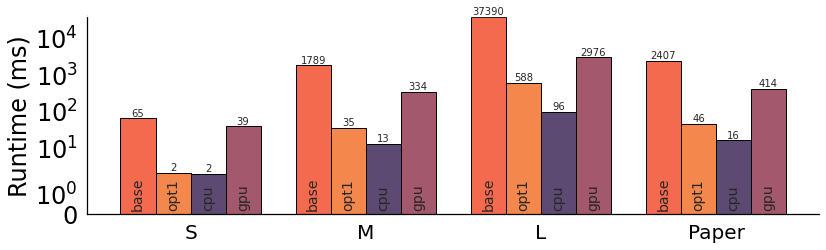

In [ ]:
# Data points ####################################################################################

kernel_name = 'Gramschmidt'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([64.6,1788.607,37389.5,2406.737])
optimized_1 = np.array([2.111,35.4865,587.704,46.1955])
npbench_cpu = np.array([2,13,96,16])
npbench_gpu = np.array([39,334,2976,414])

# baseline = np.true_divide(baseline, 1000.0)
# optimized_1 = np.true_divide(optimized_1, 1000.0)
# npbench_cpu = np.true_divide(npbench_cpu, 1000.0)
# npbench_gpu = np.true_divide(npbench_gpu, 1000.0)

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - 1.5*bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks - 0.5*bar_width, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + 0.5*bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

rects4 = ax1.bar(input_size_xaxis_ticks + 1.5*bar_width, npbench_gpu, width= bar_width, color=color_npbench_GPU,
       label="NPBench GPU", edgecolor = 'black')

## PLOT settings #########################################################################

def autolabel(rects, bar_label):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        # if height < 0.099:
        #     printer = '%.0fms' % (height*1000)
        # else:
        printer = '%.0f' % height
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                printer, fontsize=10,
                ha='center', va='bottom')
        
        height = 0.2
        ax1.text(rect.get_x() + rect.get_width()/2., height,
                bar_label, fontsize=14, rotation = 90,
                ha='center', va='bottom', color = 'white')
autolabel(rects2, "opt1")
autolabel(rects3, "base")
autolabel(rects1, "cpu")
autolabel(rects4, "gpu")
# ax1.set_title('Runtime for {}'.format(kernel_name), loc='left', pad = 25)
# ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Runtime (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)
# plt.legend(ncol = 2, bbox_to_anchor=(0.49, 1.22), frameon=False)
plt.tight_layout() #Cuts waste white space

## PLOT settings #########################################################################
plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()

## Cavity Flow

### Roofline

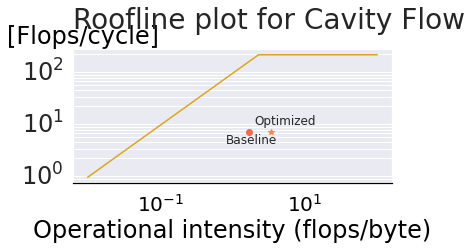

In [ ]:
# Data points
kernel_name = 'Cavity Flow'
#peak performance [GFLOPS]
peak_perf = 194.35
#bandwidth [GB/sec]
stream_bw =  4*21.33 # 4 DRAM sticks in fpga1
#[computational intensity, performance, color]
kernel = [[1.71, 6.27, color_baseline, 'o'], 
          [3.4, 6.48, color_optimized1, '*']]

kernel_names = ['Baseline', 'Optimized']

################################################################
 
fig, ax = plt.subplots()
temp = []

#plot roofline
x = np.arange(0.01,100,0.01)
left_roof = x * stream_bw
for i in range(len(x)):
    temp.append(min(left_roof[i],peak_perf))

y = np.array(temp)
ax.plot(x,y,color='goldenrod')

#plot kernels
for i in range(len(kernel)):
    ax.plot(kernel[i][0], kernel[i][1], kernel[i][3], color=kernel[i][2])

# Add labels to each datapoint
ax.annotate(kernel_names[0], xy = (kernel[0][0] - 0.9, kernel[0][1] - 2.5), fontsize = 12)
ax.annotate(kernel_names[1], xy = (kernel[1][0] - 1.4, kernel[1][1] + 2.5), fontsize = 12)

## Roofline settings #########################################################################
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title('Roofline plot for {}'.format(kernel_name), loc='left', pad = 20)
ax.set_xlabel('Operational intensity (flops/byte)')
ax.set_ylabel('[Flops/cycle]', rotation=0, loc = 'top')
ax.grid(which="both")
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
# plt.legend(loc='upper left')
ax.yaxis.set_label_coords(0.27, 1)

# plt.xticks(x, x)
plt.tight_layout() #Cuts waste white space
plt.savefig('./{}_roofline.png'.format(kernel_name),
            facecolor=fig.get_facecolor(), bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()
 

### Latency comparison

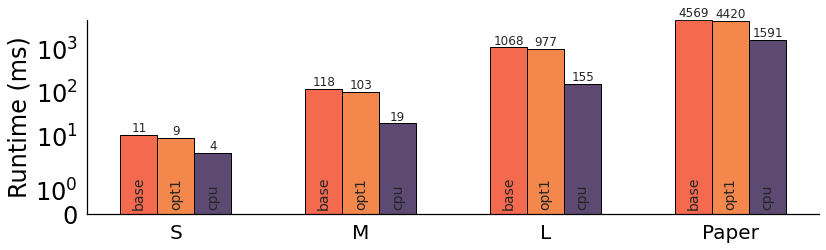

In [ ]:
# Data points ####################################################################################

kernel_name = 'Cavity Flow'

input_size = ['S', 'M', 'L', 'Paper']
input_size_xaxis_ticks = np.array(range(0, len(input_size)))

baseline =    np.array([10.503,118,1068,4569])
optimized_1 = np.array([8.844,103,977,4420])
npbench_cpu = np.array([4,19,155,1591])

# baseline = np.true_divide(baseline, 1000.0)
# optimized_1 = np.true_divide(optimized_1, 1000.0)
# npbench_cpu = np.true_divide(npbench_cpu, 1000.0)

## PLOT ####################################################################################
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)
ax1.set_facecolor('None')

bar_width = 0.2

rects3 = ax1.bar(input_size_xaxis_ticks - bar_width, baseline, width= bar_width, color=color_baseline,
       label="Baseline", edgecolor = 'black')

rects2 = ax1.bar(input_size_xaxis_ticks, optimized_1, width= bar_width, color=color_optimized1,
       label="Optimized", edgecolor = 'black')

rects1 = ax1.bar(input_size_xaxis_ticks + bar_width, npbench_cpu, width= bar_width, color=color_npbench_CPU,
       label="NPBench CPU", edgecolor = 'black')

## PLOT settings #########################################################################

def autolabel(rects, bar_label):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        # if height < 0.099:
            # printer = '%.0fms' % (height*1000)
        # else:
        printer = '%.0f' % height
        ax1.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                printer, fontsize=12,
                ha='center', va='bottom')
        
        height = 0.2
        ax1.text(rect.get_x() + rect.get_width()/2., height,
                bar_label, fontsize=14, rotation = 90,
                ha='center', va='bottom', color = 'white')
autolabel(rects1, "cpu")
autolabel(rects2, "opt1")
autolabel(rects3, "base")

# ax1.set_title('Runtime for {}'.format(kernel_name), loc='left', pad = 25)
# ax1.set_xlabel('Input size', color='black')
ax1.set_ylabel('Runtime (ms)', color='black')
ax1.set_xticks(input_size_xaxis_ticks)
ax1.set_xticklabels(input_size)
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.yaxis.set_label_coords(0.25, .99999)
ax1.set_yscale('symlog')
ax.grid(False)
# plt.legend(ncol = 2, bbox_to_anchor=(0.49, 1.22), frameon=False)
plt.tight_layout() #Cuts waste white space

## PLOT settings #########################################################################

plt.savefig('./{}_latency.pdf'.format(kernel_name),
            facecolor=fig.get_facecolor(),bbox_inches="tight", edgecolor='None',dpi=500)
plt.show()


In [ ]:
!pwd

/home/amanglik/dpchpc
